In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
!pip install openpyxl
import openpyxl
import os
import glob

In [24]:
swat_sensors_dict = {
0: ["FIT101", "Sensor", 1],
1: ["LIT101", "Sensor", 1],
2: ["MV101", "Actuator", 1],
3: ["P101", "Actuator", 1],
4: ["P102", "Actuator", 1],
5: ["AIT201", "Sensor", 2],
6: ["AIT202", "Sensor", 2],
7: ["AIT203", "Sensor", 2],
8: ["FIT201", "Sensor", 2],
9: ["MV201", "Actuator", 2],
10: ["P201", "Actuator", 2],
11: ["P202", "Actuator", 2],
12: ["P203", "Actuator", 2],
13: ["P204", "Actuator", 2],
14: ["P205", "Actuator", 2],
15: ["P206", "Actuator", 2],
16: ["DPIT301", "Sensor", 3],
17: ["FIT301", "Sensor", 3],
18: ["LIT301", "Sensor", 3],
19: ["MV301", "Actuator", 3],
20: ["MV302", "Actuator", 3],
21: ["MV303", "Actuator", 3],
22: ["MV304", "Actuator", 3],
23: ["P301", "Actuator", 3],
24: ["P302", "Actuator", 3],
25: ["AIT401", "Sensor", 4],
26: ["AIT402", "Sensor", 4],
27: ["FIT401", "Sensor", 4],
28: ["LIT401", "Actuator", 4],  # Note: LIT401 is listed as an Actuator in your data, though LIT typically indicates a sensor
29: ["P401", "Actuator", 4],
30: ["P402", "Actuator", 4],
31: ["P403", "Actuator", 4],
32: ["P404", "Actuator", 4],
33: ["UV401", "Actuator", 4],
34: ["AIT501", "Sensor", 5],
35: ["AIT502", "Sensor", 5],
36: ["AIT503", "Sensor", 5],
37: ["AIT504", "Sensor", 5],
38: ["FIT501", "Sensor", 5],
39: ["FIT502", "Sensor", 5],
40: ["FIT503", "Sensor", 5],
41: ["FIT504", "Sensor", 5],
42: ["P501", "Actuator", 5],
43: ["P502", "Actuator", 5],
44: ["PIT501", "Sensor", 5],
45: ["PIT502", "Sensor", 5],
46: ["PIT503", "Sensor", 5],
47: ["FIT601", "Sensor", 6],
48: ["P601", "Actuator", 6],
49: ["P602", "Actuator", 6],
50: ["P603", "Actuator", 6]
}

swat_sensors_dict_names = {
    "FIT-101": 0,
    "LIT-101": 1,
    "MV-101": 2,
    "P-101": 3,
    "P-102": 4,
    "AIT-201": 5,
    "AIT-202": 6,
    "AIT-203": 7,
    "FIT-201": 8,
    "MV-201": 9,
    "P-201": 10,
    "P-202": 11,
    "P-203": 12,
    "P-204": 13,
    "P-205": 14,
    "P-206": 15,
    "DPIT-301": 16,
    "FIT-301": 17,
    "LIT-301": 18,
    "MV-301": 19,
    "MV-302": 20,
    "MV-303": 21,
    "MV-304": 22,
    "P-301": 23,
    "P-302": 24,
    "AIT-401": 25,
    "AIT-402": 26,
    "FIT-401": 27,
    "LIT-401": 28,
    "P-401": 29,
    "P-402": 30,
    "P-403": 31,
    "P-404": 32,
    "UV-401": 33,
    "AIT-501": 34,
    "AIT-502": 35,
    "AIT-503": 36,
    "AIT-504": 37,
    "FIT-501": 38,
    "FIT-502": 39,
    "FIT-503": 40,
    "FIT-504": 41,
    "P-501": 42,
    "P-502": 43,
    "PIT-501": 44,
    "PIT-502": 45,
    "PIT-503": 46,
    "FIT-601": 47,
    "P-601": 48,
    "P-602": 49,
    "P-603": 50
}

wadi_sensors_dict = {
    # Primary Grid (P1)
    0: ["1_AIT_001_PV", "Sensor", "P1"],  # Water quality sensor
    1: ["1_AIT_002_PV", "Sensor", "P1"],  # Water quality sensor
    2: ["1_AIT_003_PV", "Sensor", "P1"],  # Water quality sensor
    3: ["1_AIT_004_PV", "Sensor", "P1"],  # Water quality sensor
    4: ["1_AIT_005_PV", "Sensor", "P1"],  # Water quality sensor
    5: ["1_FIT_001_PV", "Sensor", "P1"],  # Flow meter
    6: ["1_LS_001_AL", "Sensor", "P1"],   # Level switch alarm
    7: ["1_LS_002_AL", "Sensor", "P1"],   # Level switch alarm
    8: ["1_LT_001_PV", "Sensor", "P1"],   # Level transmitter
    9: ["1_MV_001_STATUS", "Actuator", "P1"],  # Motorized valve
    10: ["1_MV_002_STATUS", "Actuator", "P1"],  # Motorized valve
    11: ["1_MV_003_STATUS", "Actuator", "P1"],  # Motorized valve
    12: ["1_MV_004_STATUS", "Actuator", "P1"],  # Motorized valve
    13: ["1_P_001_STATUS", "Actuator", "P1"],   # Pump
    14: ["1_P_002_STATUS", "Actuator", "P1"],   # Pump
    15: ["1_P_003_STATUS", "Actuator", "P1"],   # Pump
    16: ["1_P_004_STATUS", "Actuator", "P1"],   # Pump
    17: ["1_P_005_STATUS", "Actuator", "P1"],   # Pump
    18: ["1_P_006_STATUS", "Actuator", "P1"],   # Pump

    # Secondary Grid Part A (P2A - Elevated Reservoir)
    19: ["2_DPIT_001_PV", "Sensor", "P2A"],  # Differential pressure indicator
    20: ["2_FIT_001_PV", "Sensor", "P2A"],   # Flow meter
    21: ["2_FIT_002_PV", "Sensor", "P2A"],   # Flow meter
    22: ["2_FIT_003_PV", "Sensor", "P2A"],   # Flow meter
    23: ["2_LT_001_PV", "Sensor", "P2A"],    # Level transmitter - elevated reservoir
    24: ["2_LT_002_PV", "Sensor", "P2A"],    # Level transmitter - elevated reservoir
    25: ["2_LS_001_AL", "Sensor", "P2A"],    # Level switch alarm (low) for elevated reservoir tanks
    26: ["2_LS_002_AL", "Sensor", "P2A"],    # Level switch alarm (low) for elevated reservoir tanks
    27: ["2_MV_001_STATUS", "Actuator", "P2A"],  # Motorized valve
    28: ["2_MV_002_STATUS", "Actuator", "P2A"],  # Motorized valve
    29: ["2_MV_003_STATUS", "Actuator", "P2A"],  # Motorized valve
    30: ["2_MV_004_STATUS", "Actuator", "P2A"],  # Motorized valve
    31: ["2_MV_005_STATUS", "Actuator", "P2A"],  # Motorized valve
    32: ["2_MV_006_STATUS", "Actuator", "P2A"],  # Motorized valve
    33: ["2_MV_009_STATUS", "Actuator", "P2A"],  # Motorized valve
    34: ["2_P_001_STATUS", "Actuator", "P2A"],   # Pump
    35: ["2_P_002_STATUS", "Actuator", "P2A"],   # Pump
    36: ["2_P_003_SPEED", "Actuator", "P2A"],    # Speed control for pump 3
    37: ["2_P_003_STATUS", "Actuator", "P2A"],   # Status of pump 3
    38: ["2_P_004_SPEED", "Actuator", "P2A"],    # Speed control for pump 4
    39: ["2_P_004_STATUS", "Actuator", "P2A"],   # Status of pump 4
    40: ["2_PIC_003_CO", "Actuator", "P2A"],     # Control output for pressure controller 3
    41: ["2_PIC_003_PV", "Sensor", "P2A"],       # Process value for pressure controller 3
    42: ["2_PIC_003_SP", "Sensor", "P2A"],       # Setpoint for pressure controller 3
    43: ["2_PIT_001_PV", "Sensor", "P2A"],       # Pressure indicator
    44: ["2_PIT_002_PV", "Sensor", "P2A"],       # Pressure indicator
    45: ["2_PIT_003_PV", "Sensor", "P2A"],       # Pressure indicator
    46: ["2A_AIT_001_PV", "Sensor", "P2A"],      # Water quality sensor
    47: ["2A_AIT_002_PV", "Sensor", "P2A"],      # Water quality sensor
    48: ["2A_AIT_003_PV", "Sensor", "P2A"],      # Water quality sensor
    49: ["2A_AIT_004_PV", "Sensor", "P2A"],      # Water quality sensor

    # Secondary Grid Part B (P2B - Consumer Tanks)
    50: ["2_FIC_101_PV", "Sensor", "P2B"],       # Flow indicator/controller process value
    51: ["2_FIC_101_CO", "Actuator", "P2B"],     # Control output for flow controller 101
    52: ["2_FIC_101_SP", "Sensor", "P2B"],       # Setpoint for flow controller 101
    53: ["2_FIC_201_PV", "Sensor", "P2B"],       # Flow indicator/controller process value
    54: ["2_FIC_201_CO", "Actuator", "P2B"],     # Control output for flow controller 201
    55: ["2_FIC_201_SP", "Sensor", "P2B"],       # Setpoint for flow controller 201
    56: ["2_FIC_301_PV", "Sensor", "P2B"],       # Flow indicator/controller process value
    57: ["2_FIC_301_CO", "Actuator", "P2B"],     # Control output for flow controller 301
    58: ["2_FIC_301_SP", "Sensor", "P2B"],       # Setpoint for flow controller 301
    59: ["2_FIC_401_PV", "Sensor", "P2B"],       # Flow indicator/controller process value
    60: ["2_FIC_401_CO", "Actuator", "P2B"],     # Control output for flow controller 401
    61: ["2_FIC_401_SP", "Sensor", "P2B"],       # Setpoint for flow controller 401
    62: ["2_FIC_501_PV", "Sensor", "P2B"],       # Flow indicator/controller process value
    63: ["2_FIC_501_CO", "Actuator", "P2B"],     # Control output for flow controller 501
    64: ["2_FIC_501_SP", "Sensor", "P2B"],       # Setpoint for flow controller 501
    65: ["2_FIC_601_PV", "Sensor", "P2B"],       # Flow indicator/controller process value
    66: ["2_FIC_601_CO", "Actuator", "P2B"],     # Control output for flow controller 601
    67: ["2_FIC_601_SP", "Sensor", "P2B"],       # Setpoint for flow controller 601
    68: ["2_FQ_101_PV", "Sensor", "P2B"],        # Flow totalizer
    69: ["2_FQ_201_PV", "Sensor", "P2B"],        # Flow totalizer
    70: ["2_FQ_301_PV", "Sensor", "P2B"],        # Flow totalizer
    71: ["2_FQ_401_PV", "Sensor", "P2B"],        # Flow totalizer
    72: ["2_FQ_501_PV", "Sensor", "P2B"],        # Flow totalizer
    73: ["2_FQ_601_PV", "Sensor", "P2B"],        # Flow totalizer
    74: ["2_LS_101_AH", "Sensor", "P2B"],        # Level switch high alarm
    75: ["2_LS_101_AL", "Sensor", "P2B"],        # Level switch low alarm
    76: ["2_LS_201_AH", "Sensor", "P2B"],        # Level switch high alarm
    77: ["2_LS_201_AL", "Sensor", "P2B"],        # Level switch low alarm
    78: ["2_LS_301_AH", "Sensor", "P2B"],        # Level switch high alarm
    79: ["2_LS_301_AL", "Sensor", "P2B"],        # Level switch low alarm
    80: ["2_LS_401_AH", "Sensor", "P2B"],        # Level switch high alarm
    81: ["2_LS_401_AL", "Sensor", "P2B"],        # Level switch low alarm
    82: ["2_LS_501_AH", "Sensor", "P2B"],        # Level switch high alarm
    83: ["2_LS_501_AL", "Sensor", "P2B"],        # Level switch low alarm
    84: ["2_LS_601_AH", "Sensor", "P2B"],        # Level switch high alarm
    85: ["2_LS_601_AL", "Sensor", "P2B"],        # Level switch low alarm
    86: ["2_MCV_007_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 7
    87: ["2_MCV_101_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 101
    88: ["2_MCV_201_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 201
    89: ["2_MCV_301_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 301
    90: ["2_MCV_401_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 401
    91: ["2_MCV_501_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 501
    92: ["2_MCV_601_CO", "Actuator", "P2B"],     # Control output for motorized consumer valve 601
    93: ["2_MV_101_STATUS", "Actuator", "P2B"],  # Status of motorized valve 101 in consumer section
    94: ["2_MV_201_STATUS", "Actuator", "P2B"],  # Status of motorized valve 201 in consumer section
    95: ["2_MV_301_STATUS", "Actuator", "P2B"],  # Status of motorized valve 301 in consumer section
    96: ["2_MV_401_STATUS", "Actuator", "P2B"],  # Status of motorized valve 401 in consumer section
    97: ["2_MV_501_STATUS", "Actuator", "P2B"],  # Status of motorized valve 501 in consumer section
    98: ["2_MV_601_STATUS", "Actuator", "P2B"],  # Status of motorized valve 601 in consumer section
    99: ["2_SV_101_STATUS", "Actuator", "P2B"],  # Solenoid valve
    100: ["2_SV_201_STATUS", "Actuator", "P2B"], # Solenoid valve
    101: ["2_SV_301_STATUS", "Actuator", "P2B"], # Solenoid valve
    102: ["2_SV_401_STATUS", "Actuator", "P2B"], # Solenoid valve
    103: ["2_SV_501_STATUS", "Actuator", "P2B"], # Solenoid valve
    104: ["2_SV_601_STATUS", "Actuator", "P2B"], # Solenoid valve
    105: ["2B_AIT_001_PV", "Sensor", "P2B"],     # Water quality sensor
    106: ["2B_AIT_002_PV", "Sensor", "P2B"],     # Water quality sensor
    107: ["2B_AIT_003_PV", "Sensor", "P2B"],     # Water quality sensor
    108: ["2B_AIT_004_PV", "Sensor", "P2B"],     # Water quality sensor

    # Return Water Grid (P3)
    109: ["3_AIT_001_PV", "Sensor", "P3"],       # Water quality sensor
    110: ["3_AIT_002_PV", "Sensor", "P3"],       # Water quality sensor
    111: ["3_AIT_003_PV", "Sensor", "P3"],       # Water quality sensor
    112: ["3_AIT_004_PV", "Sensor", "P3"],       # Water quality sensor
    113: ["3_AIT_005_PV", "Sensor", "P3"],       # Water quality sensor
    114: ["3_FIT_001_PV", "Sensor", "P3"],       # Flow meter
    115: ["3_LS_001_AL", "Sensor", "P3"],        # Level switch alarm
    116: ["3_LT_001_PV", "Sensor", "P3"],        # Level transmitter
    117: ["3_MV_001_STATUS", "Actuator", "P3"],  # Motorized valve
    118: ["3_MV_002_STATUS", "Actuator", "P3"],  # Motorized valve
    119: ["3_MV_003_STATUS", "Actuator", "P3"],  # Motorized valve
    120: ["3_P_001_STATUS", "Actuator", "P3"],   # Pump
    121: ["3_P_002_STATUS", "Actuator", "P3"],   # Pump
    122: ["3_P_003_STATUS", "Actuator", "P3"],   # Pump
    123: ["3_P_004_STATUS", "Actuator", "P3"],   # Pump

    # System-wide parameters
    124: ["LEAK_DIFF_PRESSURE", "Sensor", "System"],      # Differential pressure used to detect leaks
    125: ["PLANT_START_STOP_LOG", "Sensor", "System"],    # System-wide log for plant startup/shutdown
    126: ["TOTAL_CONS_REQUIRED_FLOW", "Sensor", "System"] # Total required consumer flow across all tanks
}

In [25]:
import pandas as pd

def extract_attack_points(excel_file):
    """
    Read an Excel file and create a list of sets containing comma-separated strings
    from the 'Attack Point' column.

    Args:
        excel_file (str): Path to the Excel file

    Returns:
        list: A list of sets, where each set contains individual attack points
    """
    try:
        # Read the Excel file
        df = pd.read_excel(excel_file)

        # Check if 'Attack Point' column exists
        if 'Attack Point' not in df.columns:
            # Try to find a column that might contain 'Attack Point' (case insensitive)
            attack_cols = [col for col in df.columns if 'attack point' in col.lower()]
            if attack_cols:
                attack_point_col = attack_cols[0]
            else:
                raise ValueError("'Attack Point' column not found in the Excel file")
        else:
            attack_point_col = 'Attack Point'

        # Process each row in the Attack Point column
        attack_point_sets = []

        for value in df[attack_point_col]:
            # Handle NaN values
            if pd.isna(value):
                attack_point_sets.append(set())
                continue

            # Convert to string to handle any numeric values
            value_str = str(value).strip()

            # Check for "No Physical Impact Attack" case
            if value_str == "No Physical Impact Attack":
                attack_point_sets.append(set())
            else:
                # Split by comma and create a set of trimmed strings
                points = {point.strip() for point in value_str.split(',')}
                attack_point_sets.append(points)

        print(f"Successfully processed {len(attack_point_sets)} rows from the Attack Point column")
        return attack_point_sets

    except Exception as e:
        print(f"Error processing Excel file: {e}")
        return None

# Example usage

file_path = "List_of_attacks_Final_swat.xlsx"
#there are 41 attacks
attack_points_swat = extract_attack_points(file_path)[:41]

# Print some examples of the extracted sets
if attack_points_swat:
    for i, point_set in enumerate(attack_points_swat[:5]):
        print(f"Row {i+1}: {point_set}")

Successfully processed 49 rows from the Attack Point column
Row 1: {'MV-101'}
Row 2: {'P-102'}
Row 3: {'LIT-101'}
Row 4: {'MV-504'}
Row 5: set()


In [26]:
import collections
#TODO check correctness, see if adjacency list can be a tensor
def get_neighborhood_and_paths(sensors_dict, adjacency_list, input_nodes):
    """
    Finds nodes that are:
    1. Direct neighbors of any input node
    2. On any shortest path between input nodes

    Args:
        adjacency_list: A list where index i contains the list of neighbors of node i
        input_nodes: A set of node indices

    Returns:
        A set of node indices representing the extended neighborhood
    """
    # Make sure input_nodes is a set
    # Step 1: Find all direct neighbors
    direct_neighbors = set()
    for node in input_nodes:
        if node < len(adjacency_list):
            direct_neighbors.update(adjacency_list[node])

    # Remove input nodes from direct neighbors if they were included
    direct_neighbors = direct_neighbors - input_nodes

    # Step 2: Find all shortest paths between input nodes
    shortest_path_nodes = set()

    # For each pair of input nodes
    for source in input_nodes:
        if source >= len(adjacency_list):
            continue

        # Run BFS to find shortest paths to all other input nodes
        queue = collections.deque([(source, [source])])
        visited = {source}
        found_paths = {}

        while queue:
            current, path = queue.popleft()

            # If we found another input node, record the path
            if current in input_nodes and current != source:
                if current not in found_paths:
                    found_paths[current] = path

            # Don't need to explore further if we've already found all input nodes
            if len(found_paths) == len(input_nodes) - 1:
                break

            # Explore neighbors
            if current < len(adjacency_list):
                for neighbor in adjacency_list[int(current)]:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        queue.append((neighbor, path + [neighbor]))

        # Add intermediate nodes from shortest paths to the result
        for target, path in found_paths.items():
            # Add all nodes in the path except source and target
            for node in path[1:-1]:
                shortest_path_nodes.add(node)

    # same group neighbours
    aggregated_neighbours = set()
    for node in input_nodes:
        node_group = sensors_dict[node][2]
        neighbours = set([k for k, v in sensors_dict.items() if v[2] == node_group])
        aggregated_neighbours = aggregated_neighbours | neighbours
    # Combine direct neighbors and nodes on shortest paths
    result = direct_neighbors | shortest_path_nodes | aggregated_neighbours
    return result

# Example usage
def read_adjacency_file(adjacency_file):
    adjacency_list = []
    try:
        with open(adjacency_file, 'r') as f:
            for line in f:
                # Skip empty lines
                if not line.strip():
                    continue
                neighbors = [int(x) for x in line.strip().split()][1:]
                adjacency_list.append(neighbors)
        print(f"Successfully read adjacency file with {len(adjacency_list)} nodes")
        return adjacency_list
    except Exception as e:
        print(f"Error reading adjacency file: {e}")
        return None

### Swat graph visualisation function

In [27]:
def visualize_swat_graph1(adjacency_list, sensor_dict, attack_set, graph_iteration, attack_iteration, node_subset=None):
    """
    Visualize the sWAT dataset as a graph with color coding for sensors/actuators and groups.
    Attack nodes are highlighted in bright red.

    Parameters:
    -----------
    adjacency_list : list
        List of adjacency lists for each node
    sensor_dict : dict
        Dictionary containing sensor information
    attack_set : set
        Set of node indices that are under attack (to be colored red)
    graph_iteration : int
        Identifier for the graph iteration to use in the filename
    attack_iteration : int
        Identifier for the attack iteration to use in the filename
    node_subset : list, optional
        List of node indices to visualize. If None, visualizes the entire graph.

    Returns:
    --------
    G : networkx.Graph
        The graph object
    pos : dict
        Node positions for the graph
    """
    # Create graph
    G = nx.Graph()

    # Filter nodes if subset is provided
    if node_subset is not None:
        # Convert to set for O(1) lookup
        node_subset = set(node_subset)
        # Only include nodes that are in the subset
        filtered_sensor_dict = {k: v for k, v in sensor_dict.items() if k in node_subset}
    else:
        filtered_sensor_dict = sensor_dict

    # Add nodes with attributes
    for node_id, (name, node_type, group) in filtered_sensor_dict.items():
        G.add_node(node_id, name=name, node_type=node_type, group=group, is_attack=node_id in attack_set)

    # Add edges from adjacency list (only between nodes in our subset)
    for i, neighbors in enumerate(adjacency_list):
        # Skip if node i is not in our subset (if subset is provided)
        if node_subset is not None and i not in node_subset:
            continue

        # Make sure node i exists in our sensor dictionary
        if i not in sensor_dict:
            print(f"Warning: Node {i} in adjacency list not found in sensor dictionary")
            # If we're only showing a subset, we might want to skip this node
            if node_subset is not None:
                continue
            # Otherwise, add this node with default attributes
            G.add_node(i, name=f"Unknown_{i}", node_type="Unknown", group=1, is_attack=i in attack_set)

        for neighbor in neighbors:
            # Skip edges to nodes not in our subset (if subset is provided)
            if node_subset is not None and neighbor not in node_subset:
                continue

            # Make sure neighbor exists in our sensor dictionary
            if neighbor not in sensor_dict:
                print(f"Warning: Neighbor {neighbor} of node {i} not found in sensor dictionary")
                # If we're only showing a subset, we might want to skip this edge
                if node_subset is not None:
                    continue
                # Otherwise, add this node with default attributes
                G.add_node(neighbor, name=f"Unknown_{neighbor}", node_type="Unknown", group=1, is_attack=neighbor in attack_set)
            # avoid drawing recurrent edges
            if i != neighbor:
                G.add_edge(i, neighbor)

    # Set up colors for different groups and node types
    group_colors = plt.cm.tab10(np.linspace(0, 1, 6))
    node_colors = {}

    # Define the bright red color for attack nodes
    attack_color = mcolors.to_rgba('red', alpha=1.0)

    for node in G.nodes():
        # First check if it's an attack node
        if G.nodes[node].get('is_attack', False):
            node_colors[node] = attack_color
            continue

        # If not an attack node, use the regular coloring scheme
        # Check if the node has attributes
        if 'node_type' not in G.nodes[node] or 'group' not in G.nodes[node]:
            # Handle nodes that might not be in the sensor dictionary
            print(f"Warning: Node {node} missing attributes. Assigning defaults.")
            node_type = "Unknown"
            group = 1  # Default to group 1
        else:
            node_type = G.nodes[node]['node_type']
            group = G.nodes[node]['group']

        # Get base color for the group
        base_color = group_colors[group-1]

        # Modify color based on type (darker for actuators, lighter for sensors)
        if node_type == "Actuator":
            node_colors[node] = mcolors.to_rgba(base_color, alpha=1.0)
        else:  # Sensor
            # Create a lighter version of the color
            light_color = [min(1.0, c*1.3) for c in base_color[:3]]
            node_colors[node] = mcolors.to_rgba(light_color, alpha=0.8)

    # Set up node shapes based on type
    node_shapes = {'Sensor': 'o', 'Actuator': 's', 'Unknown': 'D'}

    # Create a layout using spring layout but with groups taken into account
    pos = nx.spring_layout(G, k=0.3, iterations=200, seed=42)

    # Identify disconnected nodes and place them near the center of the graph
    disconnected_nodes = [node for node, degree in dict(G.degree()).items() if degree == 0]
    if disconnected_nodes:
        center = np.mean(list(pos.values()), axis=0)  # Average position of all nodes
        for node in disconnected_nodes:
            # Place inside the cluster with a small random offset to avoid overlap
            pos[node] = center + 0.05 * np.random.rand(2)

    # Create plot
    fig = plt.figure(figsize=(16, 12))

    # Draw nodes with different colors and shapes
    for node_type in ['Sensor', 'Actuator', 'Unknown']:
        # Normal nodes (not attack nodes)
        normal_nodes = [node for node in G.nodes()
                      if G.nodes[node].get('node_type') == node_type
                      and not G.nodes[node].get('is_attack', False)]

        if normal_nodes:
            node_color = [node_colors[node] for node in normal_nodes]
            nx.draw_networkx_nodes(
                G, pos,
                nodelist=normal_nodes,
                node_color=node_color,
                node_shape=node_shapes[node_type],
                node_size=1400,
                alpha=0.8,
                edgecolors='black',
                linewidths=1.5
            )

    # Draw attack nodes separately with red color (maintain their original shape)
    for node_type in ['Sensor', 'Actuator', 'Unknown']:
        attack_nodes = [node for node in G.nodes()
                      if G.nodes[node].get('node_type') == node_type
                      and G.nodes[node].get('is_attack', False)]

        if attack_nodes:
            nx.draw_networkx_nodes(
                G, pos,
                nodelist=attack_nodes,
                node_color='red',  # Use bright red
                node_shape=node_shapes[node_type],
                node_size=1400,
                alpha=1.0,  # Full opacity
                edgecolors='black',
                linewidths=2.0  # Thicker border for emphasis
            )

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw labels with names
    labels = {node: G.nodes[node]['name'] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_weight='bold')

    # Create legends
    # Group legend
    group_handles = [plt.Line2D([0], [0], marker='o', color='w',
                    markerfacecolor=group_colors[i], markersize=10, label=f'Group {i+1}')
                    for i in range(6)]

    # Type legend
    sensor_marker = plt.Line2D([0], [0], marker='o', color='w',
                       markerfacecolor='gray', markersize=10, label='Sensor')
    actuator_marker = plt.Line2D([0], [0], marker='s', color='w',
                       markerfacecolor='gray', markersize=10, label='Actuator')
    unknown_marker = plt.Line2D([0], [0], marker='D', color='w',
                       markerfacecolor='gray', markersize=10, label='Unknown')
    attack_marker = plt.Line2D([0], [0], marker='o', color='w',
                       markerfacecolor='red', markersize=10, label='Attack Node')

    # Add legends
    plt.legend(handles=group_handles + [sensor_marker, actuator_marker, unknown_marker, attack_marker],
               loc='upper right', bbox_to_anchor=(1.15, 1))

    # Create appropriate title based on whether we're showing a subset
    if node_subset is not None:
        subset_str = ', '.join([str(n) for n in sorted(node_subset)[:5]])
        if len(node_subset) > 5:
            subset_str += f", ... ({len(node_subset)} nodes total)"
        plt.title(f'sWAT Dataset Graph Visualization - Subset: {subset_str}')
    else:
        plt.title('sWAT Dataset Graph Visualization - Complete Graph')
    plt.axis('off')
    plt.tight_layout()

    plt.savefig(f"swat_graph_visualisations_graph{graph_iteration}_attack{attack_iteration}.png", dpi=300, bbox_inches='tight')

    # Close the figure to free memory
    #plt.close(fig)

    # Return the graph and positions for further customization if needed
    return G, pos

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import warnings # Import warnings module

# Optional: Filter numpy warnings if they become excessive, but generally good to see them
# warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

def visualize_swat_graph_simple_color_robust(adjacency_list, sensor_dict, attack_set, graph_iteration, attack_iteration, node_subset=None):
    """
    Visualize the sWAT dataset graph robustly handling potential mixed integer types.
    Nodes are colored grey by default. Attack nodes are highlighted in bright red.
    Node shapes indicate type (Sensor: circle, Actuator: square, Unknown: diamond).

    Parameters:
    -----------
    adjacency_list : list
        List of adjacency lists for each node. Neighbors can be int or numpy int types.
    sensor_dict : dict
        Dictionary containing sensor information (node_id -> (name, node_type, group)).
        Keys should be convertible to int.
    attack_set : set or iterable
        Set/iterable of node indices under attack. Elements convertible to int.
    graph_iteration : int
        Identifier for the graph iteration to use in the filename
    attack_iteration : int
        Identifier for the attack iteration to use in the filename
    node_subset : list, optional
        List of node indices to visualize. Elements convertible to int.

    Returns:
    --------
    G : networkx.Graph
        The graph object using standard Python int nodes.
    pos : dict
        Node positions for the graph (keys are standard Python int).
    """
    # --- Input Type Handling & Conversion to Standard Int ---
    _attack_set_int = set()
    try:
        _attack_set_int = {int(a) for a in attack_set}
        # print(f"Debug: Processed _attack_set_int: {_attack_set_int}")
    except (ValueError, TypeError) as e:
        print(f"ERROR: Could not convert all elements of attack_set to integers: {e}. Aborting.")
        return None, None # Or raise an error

    _node_subset_set_int = None
    if node_subset is not None:
        try:
            _node_subset_set_int = {int(n) for n in node_subset}
            # print(f"Debug: Processed _node_subset_set_int: {_node_subset_set_int}")
        except (ValueError, TypeError) as e:
             print(f"ERROR: Could not convert all elements of node_subset to integers: {e}. Aborting.")
             return None, None # Or raise an error

    # Create graph - NetworkX prefers standard types for nodes
    G = nx.Graph()

    # --- Determine Nodes to Process (using standard ints) ---
    node_ids_to_consider = set()

    # Add nodes from sensor_dict keys (convert keys to int)
    try:
        sensor_keys_int = {int(k) for k in sensor_dict.keys()}
        node_ids_to_consider.update(sensor_keys_int)
    except (ValueError, TypeError) as e:
        print(f"Warning: Could not convert all sensor_dict keys to int: {e}. Skipping invalid keys.")
        # Attempt to add only valid ones
        for k in sensor_dict.keys():
            try:
                node_ids_to_consider.add(int(k))
            except (ValueError, TypeError):
                print(f"  Skipping sensor dict key: {k}")

    # Add nodes from adjacency list indices and neighbors (convert to int)
    adj_nodes_int = set()
    for i, neighbors in enumerate(adjacency_list):
        try:
            i_int = int(i) # Convert index
            adj_nodes_int.add(i_int)
            for n in neighbors:
                try:
                    n_int = int(n) # Convert neighbor
                    adj_nodes_int.add(n_int)
                except (ValueError, TypeError):
                    print(f"Warning: Non-integer neighbor '{n}' found for node index {i_int}. Skipping this neighbor.")
        except (ValueError, TypeError):
             print(f"Warning: Non-integer adjacency list index '{i}'. Skipping index.")

    node_ids_to_consider.update(adj_nodes_int)

    # Also consider nodes mentioned *only* in the attack set
    node_ids_to_consider.update(_attack_set_int)

    # Apply subset filter (comparing int with int)
    if _node_subset_set_int is not None:
        node_ids_to_process = node_ids_to_consider.intersection(_node_subset_set_int)
        # print(f"Debug: node_ids_to_process after subset filter: {node_ids_to_process}")
    else:
        node_ids_to_process = node_ids_to_consider
        # print(f"Debug: node_ids_to_process (no subset filter): {node_ids_to_process}")


    # --- Add Nodes and Edges to Graph G (using standard ints) ---
    processed_nodes_int = set() # Keep track of nodes added to G (as ints)

    # Add nodes from sensor_dict if they are in the process set
    for node_id_orig, (name, node_type, group) in sensor_dict.items():
         try:
             node_id = int(node_id_orig) # Convert key
             if node_id in node_ids_to_process:
                 # Check if this node is an attack node (int vs int comparison)
                 is_attack = node_id in _attack_set_int
                 G.add_node(node_id, name=name, node_type=node_type, group=group, is_attack=is_attack)
                 processed_nodes_int.add(node_id)
         except (ValueError, TypeError):
              print(f"Warning: Skipping sensor_dict entry with non-integer key '{node_id_orig}'.")


    # Process adjacency list for edges and potentially add nodes not in sensor_dict
    for i, neighbors in enumerate(adjacency_list):
        try:
            i_int = int(i) # Convert index
            # Ensure node 'i' should be processed
            if i_int not in node_ids_to_process:
                continue

            # Add node 'i' if not already added
            if i_int not in processed_nodes_int:
                is_attack = i_int in _attack_set_int # int vs int
                G.add_node(i_int, name=f"Unknown_{i_int}", node_type="Unknown", group=1, is_attack=is_attack)
                processed_nodes_int.add(i_int)

            for neighbor in neighbors:
                 try:
                     n_int = int(neighbor) # Convert neighbor
                 except (ValueError, TypeError):
                     # Warning already printed during adj_nodes_int collection, skip here
                     continue

                 # Ensure neighbor should be processed (int vs int)
                 if n_int not in node_ids_to_process:
                     continue

                 # Add neighbor node if not already added
                 if n_int not in processed_nodes_int:
                     is_attack = n_int in _attack_set_int # int vs int
                     G.add_node(n_int, name=f"Unknown_{n_int}", node_type="Unknown", group=1, is_attack=is_attack)
                     processed_nodes_int.add(n_int)

                 # Add edge if not a self-loop (int vs int)
                 if i_int != n_int:
                     G.add_edge(i_int, n_int) # Use standard ints for edge

        except (ValueError, TypeError):
             # Warning for index already printed, continue
             continue

    # Final Check: Ensure all attack nodes (that are in the process set) are in the graph
    for node_id in _attack_set_int: # Iterate through guaranteed integers
        if node_id in node_ids_to_process and node_id not in G:
             print(f"Info: Adding attack node {node_id} explicitly (was in attack_set and process_set but not found elsewhere).")
             G.add_node(node_id, name=f"Attack_{node_id}", node_type="Unknown", group=1, is_attack=True)
             # No need to add to processed_nodes_int here, G is the source of truth now


    # --- Simplified Color Calculation ---
    node_colors = {}
    attack_color = mcolors.to_rgba('red', alpha=1.0)
    default_color = mcolors.to_rgba('darkgrey', alpha=0.8)

    # Nodes in G are now guaranteed to be standard ints
    for node in G.nodes():
        # Ensure node is actually an int (should be, but safety check)
        if not isinstance(node, int):
             print(f"Warning: Non-integer node {node} found in graph G unexpectedly. Skipping coloring.")
             continue

        is_attack = G.nodes[node].get('is_attack', False) # Read attribute
        if is_attack:
            node_colors[node] = attack_color
        else:
            node_colors[node] = default_color

    # --- Layout ---
    node_shapes = {'Sensor': 'o', 'Actuator': 's', 'Unknown': 'D'}
    pos = {} # Initialize pos
    if G.nodes(): # Check if graph is not empty before calculating layout
        try:
            pos = nx.kamada_kawai_layout(G)
        except Exception as e:
             print(f"Warning: Layout calculation failed ({e}). Using random layout.")
             try:
                 pos = nx.random_layout(G, seed=42)
             except Exception as layout_err_fallback:
                 print(f"ERROR: Fallback random layout also failed ({layout_err_fallback}). Cannot generate positions.")
                 # No positions available, drawing might fail or be empty
    else:
        print("Info: Graph is empty. No layout calculated.")

    # --- Drawing ---
    fig, ax = plt.subplots(figsize=(16, 12))

    if not G.nodes() or not pos:
        print("Info: Cannot draw graph - No nodes or no layout positions.")
        plt.title("Empty Graph or Layout Failed")
        plt.axis('off')
    else:
        # Draw nodes type by type
        for node_type, shape in node_shapes.items():
            nodelist = [node for node, data in G.nodes(data=True) if data.get('node_type') == node_type]
            if not nodelist: continue

            # Filter positions for the current nodelist
            pos_subset = {k: v for k, v in pos.items() if k in nodelist}
            if not pos_subset: continue # Skip if no positions for these nodes

            colors = [node_colors.get(node, default_color) for node in nodelist] # Use .get for safety
            edgecolors = ['black' for node in nodelist]
            linewidths = [1.5 if not G.nodes[node].get('is_attack', False) else 2.5 for node in nodelist]
            sizes = [1400 if not G.nodes[node].get('is_attack', False) else 1600 for node in nodelist]

            nx.draw_networkx_nodes(
                G, pos_subset, ax=ax, nodelist=nodelist, node_shape=shape, node_color=colors,
                node_size=sizes, alpha=None, edgecolors=edgecolors, linewidths=linewidths
            )

        # Draw edges
        nx.draw_networkx_edges(G, pos, ax=ax, width=1.0, alpha=0.4)

        # Draw labels
        labels = {node: data.get('name', f'Node_{node}') for node, data in G.nodes(data=True)}
        nx.draw_networkx_labels(G, pos, ax=ax, labels=labels, font_size=8, font_weight='bold')

        # --- Legend ---
        type_handles = []
        legend_grey = 'grey'
        present_types = set(data.get('node_type', 'Unknown') for _, data in G.nodes(data=True))
        if 'Sensor' in present_types: type_handles.append(plt.Line2D([0], [0], marker=node_shapes['Sensor'], color='w', markerfacecolor=legend_grey, markersize=10, label='Sensor'))
        if 'Actuator' in present_types: type_handles.append(plt.Line2D([0], [0], marker=node_shapes['Actuator'], color='w', markerfacecolor=legend_grey, markersize=10, label='Actuator'))
        if 'Unknown' in present_types: type_handles.append(plt.Line2D([0], [0], marker=node_shapes['Unknown'], color='w', markerfacecolor=legend_grey, markersize=10, label='Unknown'))

        attack_handles = []
        attack_nodes_in_graph = {node for node, data in G.nodes(data=True) if data.get('is_attack', False)}
        # print(f"Debug: Attack nodes actually present in final graph G: {attack_nodes_in_graph}")

        if attack_nodes_in_graph:
            attack_handles.append(plt.Line2D([0], [0], marker='o', color='w',
                               markerfacecolor=attack_color, markeredgecolor='black', markeredgewidth=1.5,
                               markersize=10, label='Attack Node (Red)'))
        # else:
             # print("Info: No attack nodes found in the final graph G. Attack legend entry omitted.")


        ax.legend(handles=type_handles + attack_handles, loc='upper right', bbox_to_anchor=(1.18, 1.02), title="Legend")

        # --- Final Touches ---
        title_suffix = f"(Graph {graph_iteration}, Attack {attack_iteration})"
        if _node_subset_set_int is not None:
            plt.title(f'sWAT Graph Visualization {title_suffix} - Subset ({len(G.nodes())} nodes)', fontsize=14)
        else:
            plt.title(f'sWAT Graph Visualization {title_suffix} - Complete Graph ({len(G.nodes())} nodes)', fontsize=14)

        plt.axis('off')
        plt.tight_layout(rect=[0, 0, 0.9, 1])

    # --- Save Figure ---
    filename = f"swat_graph_simple_color_robust_graph{graph_iteration}_attack{attack_iteration}.png"
    try:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Graph saved to {filename}")
    except Exception as e:
        print(f"ERROR: Failed to save figure '{filename}': {e}")


    # --- Cleanup ---
    #plt.close(fig)

    return G, pos

In [29]:
def build_tensor(method,dataset):
    # Expand the tilde to the home directory
    pattern = os.path.expanduser(f"~/baselines/{method}/results/{dataset}_learned_graph*.txt")

    # Find all matching files
    file_paths = sorted(glob.glob(pattern))
    print(f"Found {len(file_paths)} files matching the pattern")

    # Function to load a matrix from a text file
    def load_matrix(file_path):
        return np.loadtxt(file_path)

    # Load all matrices into a tensor
    matrices = []
    for file_path in file_paths:
        print(f"Loading {file_path}...")
        matrix = load_matrix(file_path)
        matrices.append(matrix)
        print(f"Loaded matrix with shape {matrix.shape}")

    # Stack all matrices into a single tensor
    if matrices:
        learned_graph_tensor = np.stack(matrices).astype(int)
        print(f"Created tensor with shape {learned_graph_tensor.shape}")
    else:
        print("No matrices found")
    return learned_graph_tensor
swat_tensor=build_tensor('GDN','swat')
#wadi_tensor=build_tensor('GDN','wadi')


Found 30 files matching the pattern
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph10.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph11.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph12.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph13.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph14.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph15.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph16.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph17.txt...
Loaded matrix with shape (51, 15)
Loading /home/berentzenaej/baselines/GDN/results/swat_learned_graph18.txt...

[[ 0 17 24  3 25 23  4 32 10 29  7 20 26 35 49]
 [ 1 22 19  7 30 21 46 36 38 44  8 42 35 45 28]
 [ 2 21 26 22 18  5 28 19 39 44 34 40 35 36 45]
 [ 3 17  0  7 23 32 24 10 35 14 26 12 38 25 29]
 [ 4 32 48 13  0 49 25 29 43 10 26 11 23 15 17]
 [ 5 40 27 44 38 18 22 26 49 19 21 45 35 30 13]
 [ 6 50 20 48 17 36 10  9 24 45 32  7 43  0 15]
 [ 7 17 32 35 24  3 10 23 48  6  0 14 43 29 16]
 [ 8 12 16 14 36 47 46 19 38 35 42 45 26 24  3]
 [ 9 20  6 24 45 36 25 14  0 12 13 16 46  8 11]]
{2}
input nodes [2]
neighb set {0, 1, 2, 3, 4, np.int64(5), np.int64(18), np.int64(19), np.int64(21), np.int64(22), np.int64(26), np.int64(28), np.int64(34), np.int64(35), np.int64(36), np.int64(39), np.int64(40), np.int64(44), np.int64(45)}
{4}
input nodes [4]
neighb set {np.int64(0), 1, 2, 3, 4, np.int64(10), np.int64(11), np.int64(13), np.int64(15), np.int64(17), np.int64(23), np.int64(25), np.int64(26), np.int64(29), np.int64(32), np.int64(43), np.int64(48), np.int64(49)}
{1}
input nodes [1]
neighb set {0, 1, 

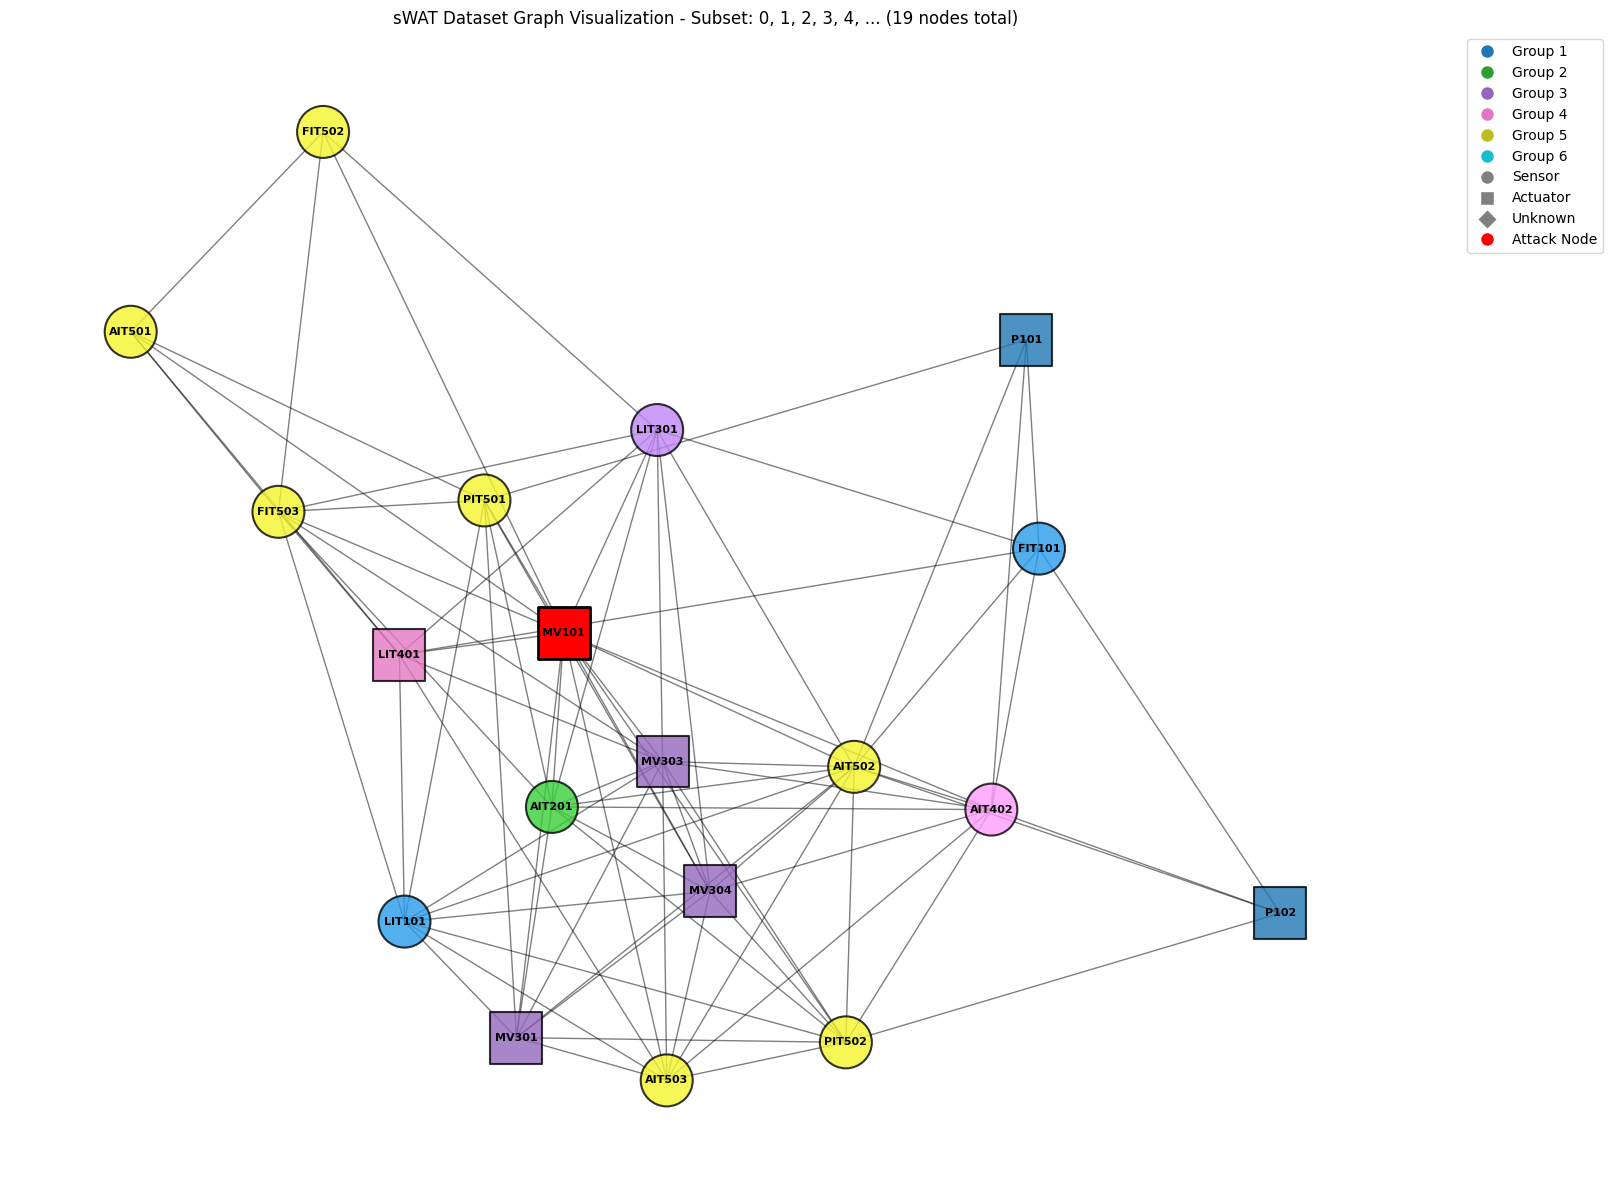

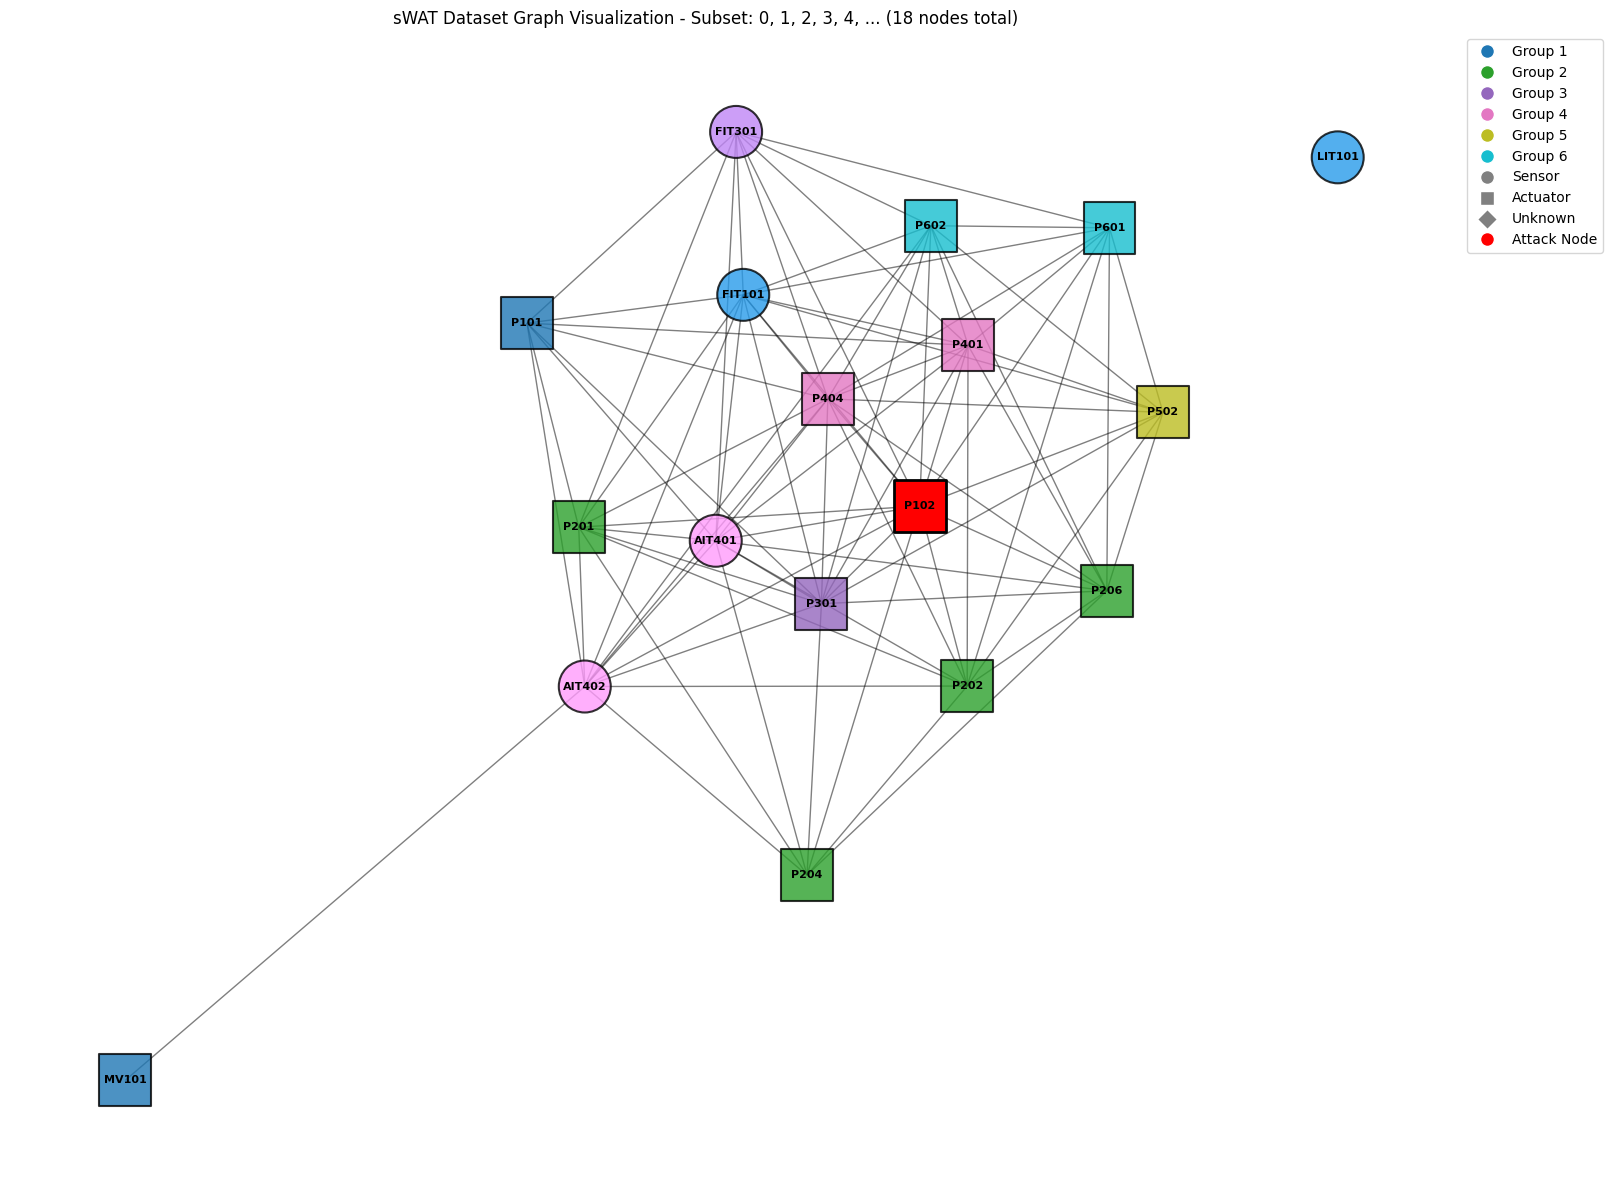

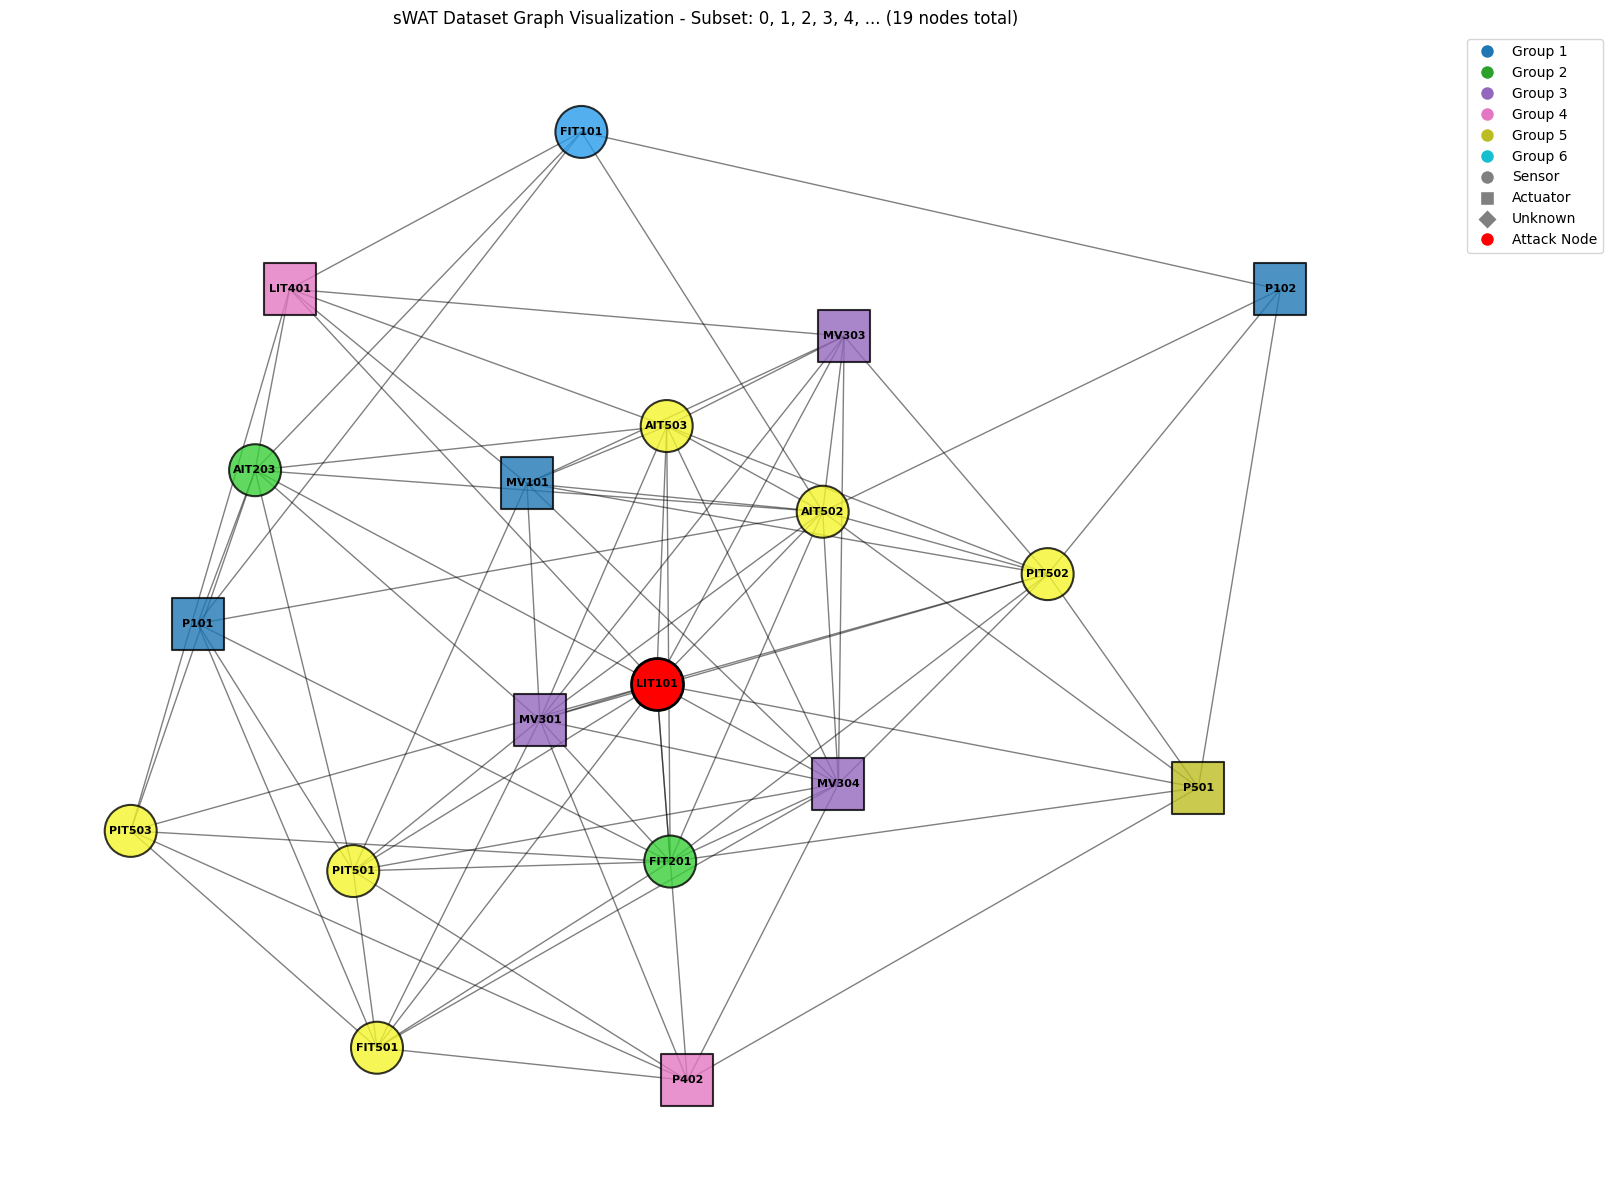

In [35]:
#swat_tensor=build_tensor('GDN','swat')
#attack_points_swat
for i, adj_matrix in enumerate(swat_tensor):
    print(adj_matrix[:10])
    for j, node_set in enumerate(attack_points_swat):
        if not all(node in swat_sensors_dict_names for node in node_set):
            print(f'node set {node_set} contains unknown node(s), skipping')
            continue
        else:
            #turn node_set into node indexes
            node_set_ids = set([swat_sensors_dict_names[node] for node in node_set])
            neighbourhood_set = get_neighborhood_and_paths(swat_sensors_dict,adj_matrix,node_set_ids)
            visualize_swat_graph1(adj_matrix, swat_sensors_dict,node_set_ids,i,j, neighbourhood_set)
        if j > 1:
            break
    break
